<a href="https://colab.research.google.com/github/spencer18001/Clustering-And-Dimensionality-Reduction---Deep-Dive/blob/main/06/0617.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install umap-learn umap-learn[plot]

## UMAP caveats

In [ ]:
import sklearn.datasets
from sklearn.datasets import fetch_openml
import sklearn

import umap
import umap.plot as uplot

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn

### Case when distances between cluster have meaning

In [ ]:
# Load the digits data
mnist = fetch_openml('mnist_784', parser='auto')

# Normalize the digits data
mnist_data = mnist.data/255
mnist_label = mnist.target

In [ ]:
mnist_umap = umap.UMAP()
embedding = mnist_umap.fit_transform(mnist_data)

<Axes: >

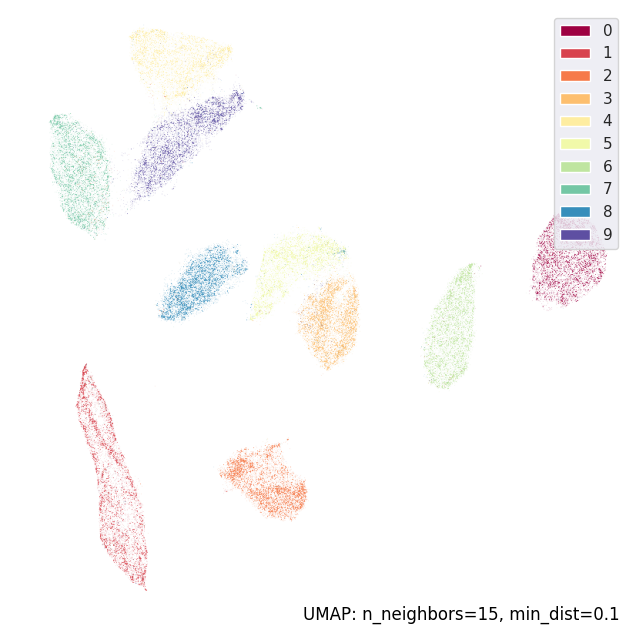

In [ ]:
uplot.points(mnist_umap, labels=mnist_label)

<Axes: >

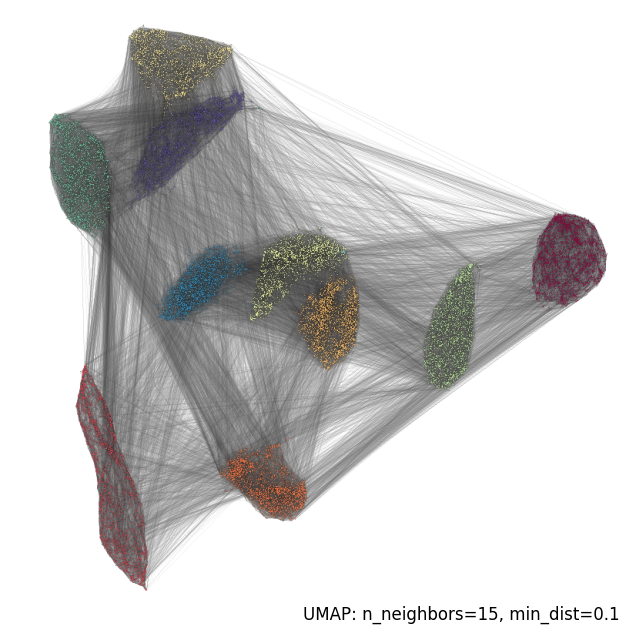

In [ ]:
umap.plot.connectivity(mnist_umap, show_points=True,labels=mnist_label)
# all of these clusters are nicely interconnected which gives validity to this global structure

<Axes: title={'center': 'Colored by RGB coords of PCA embedding'}>

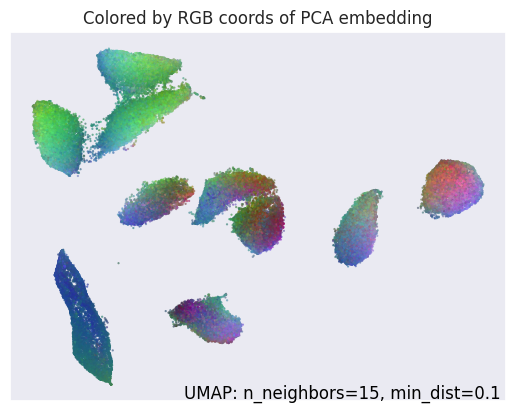

In [ ]:
umap.plot.diagnostic(mnist_umap, diagnostic_type='pca') # RGB PCA diagnostic
# we have smooth transition of colors within and between clusters
# which gives even more validity to this global structure inferred by the UMAP algorithm

### Case when distance between clusters is missleading

Text(0.5, 1.0, 'Original data')

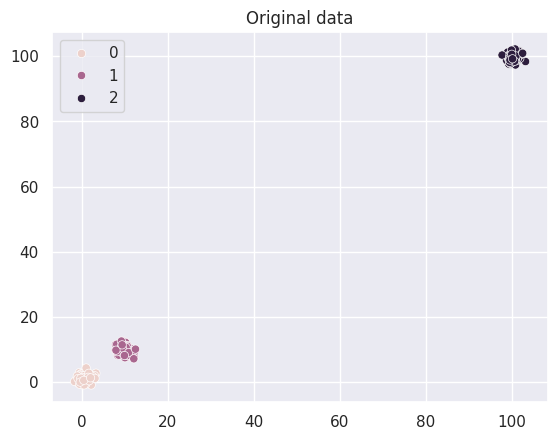

In [ ]:
# Generate the dataset
blob_centers = [[1,1,1],[10,10,10], [100,100,100]]
blob_data, blob_ids = sklearn.datasets.make_blobs( # (300,3),(300,)
    n_samples=300,
    n_features=3,
    centers=blob_centers
)

sns.set_theme()
sns.scatterplot(x=blob_data[:,0], y=blob_data[:,1], hue=blob_ids)
plt.title('Original data')

<Axes: >

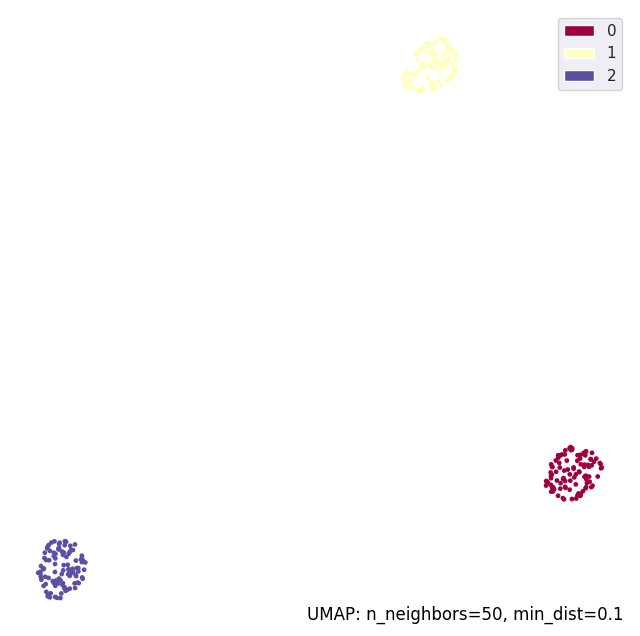

In [ ]:
umap_obj_blobs = umap.UMAP(n_neighbors=50)
embedding_blobs = umap_obj_blobs.fit_transform(blob_data)

# Plot with visible densities and labels
uplot.points(umap_obj_blobs, labels=blob_ids)
# groups are more or less equally distant which is not the case in the original data

<Axes: >

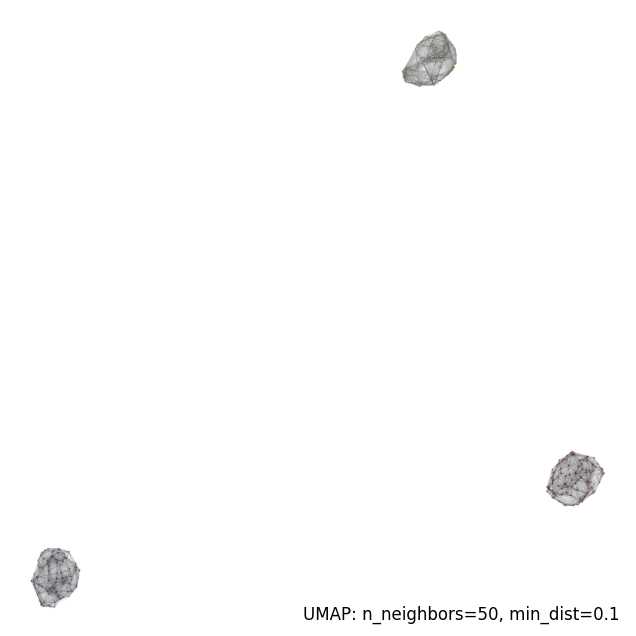

In [ ]:
umap.plot.connectivity(umap_obj_blobs, show_points=True, labels=blob_ids)
# there are no edges between these groups which means that the distances between groups are meaningless, they are random

<Axes: title={'center': 'Colored by RGB coords of PCA embedding'}>

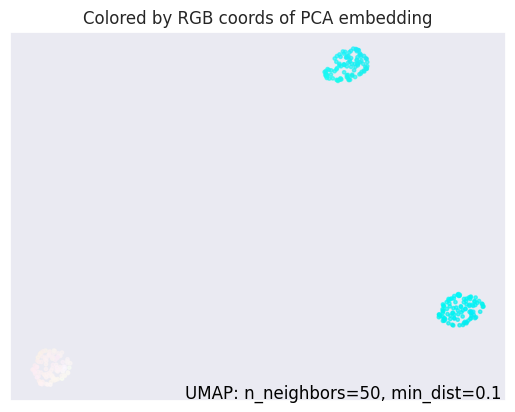

In [ ]:
umap.plot.diagnostic(umap_obj_blobs, diagnostic_type='pca')
# blue groups are close to each other, gray group is actually far from noth of these groups

### Case when cluster size is missleading

Text(0.5, 1.0, 'Original data')

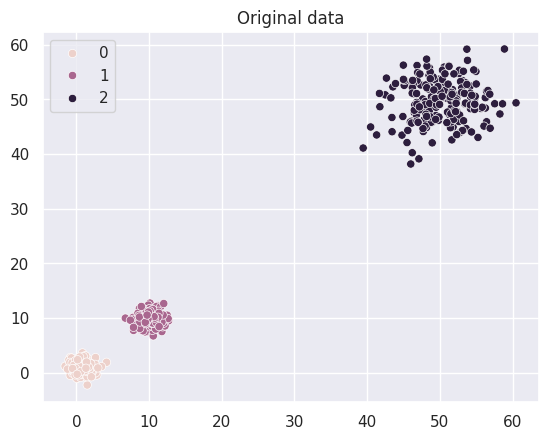

In [ ]:
# Generate the dataset
blob_centers = [[1,1],[10,10], [50,50]]
blob_data, blob_ids = sklearn.datasets.make_blobs(
    n_samples=600,
    n_features=2,
    centers=blob_centers,
    cluster_std=[1,1,4] # 1 big cluster
)

sns.scatterplot(x=blob_data[:,0], y=blob_data[:,1], hue=blob_ids)
plt.title('Original data')

<Axes: >

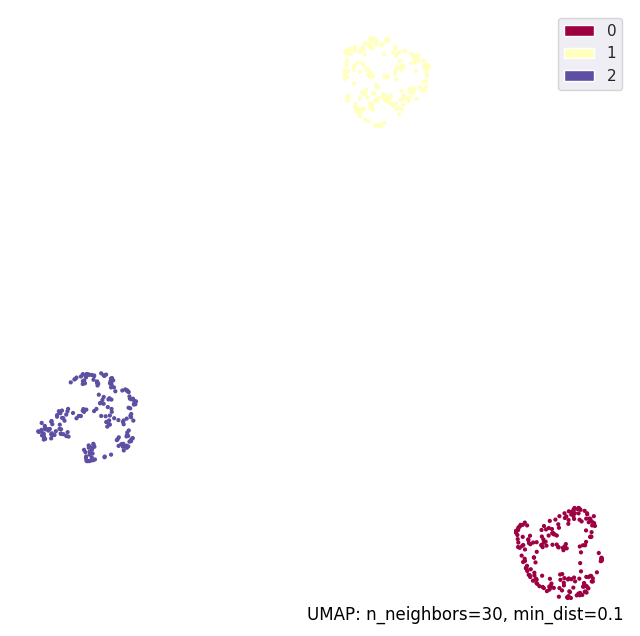

In [ ]:
umap_obj_blobs = umap.UMAP(n_neighbors=30)
embedding_blobs = umap_obj_blobs.fit_transform(blob_data)

uplot.points(umap_obj_blobs, labels=blob_ids)
# all the clusters are of the same size
# cluster sizes in UMAP don't have real meaning

### Case when random noise does not look random

In [ ]:
# Generate the dataset
blob_centers = [[1,1]]
blob_data, blob_ids = sklearn.datasets.make_blobs(
    n_samples=600,
    n_features=2,
    centers=blob_centers,
    cluster_std = [10]
)

Text(0.5, 1.0, 'Original data')

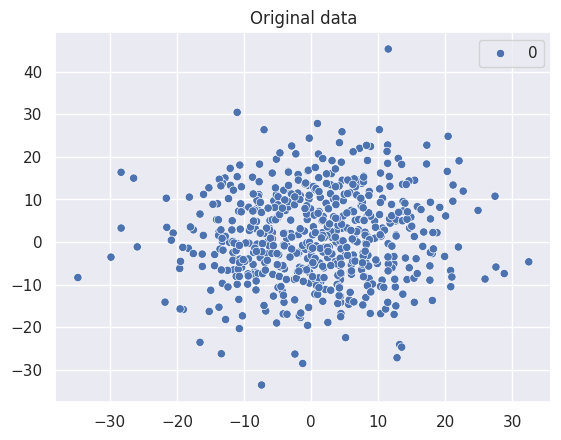

In [ ]:
sns.set_theme()
sns.scatterplot(x=blob_data[:,0], y=blob_data[:,1], hue=blob_ids)
plt.title('Original data')
# random points

<Axes: >

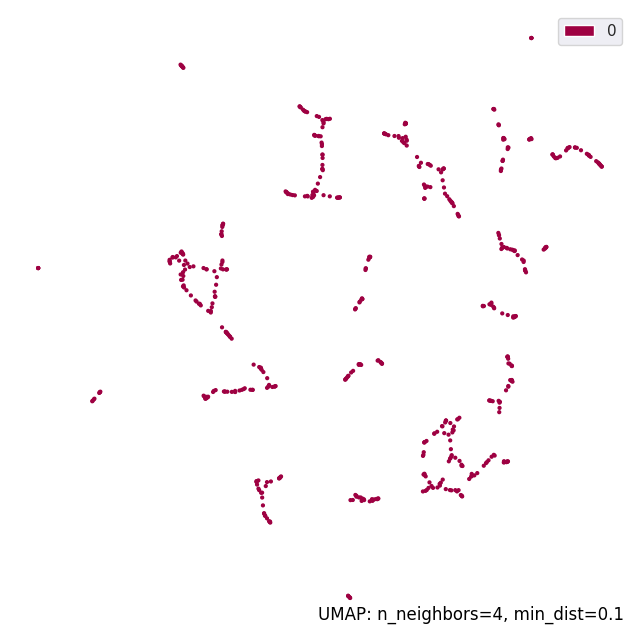

In [ ]:
umap_obj_blobs = umap.UMAP(n_neighbors=4) # low number of n_neighbors
embedding_blobs = umap_obj_blobs.fit_transform(blob_data)

uplot.points(umap_obj_blobs, labels=blob_ids)
# there are some fake patterns